In [1]:
import numpy as np
#from conf_exp6 import *
%pylab inline
#import seaborn
import matplotlib.pyplot as plt
import utils.img_utils as iu
import json


def mm(A, cast_int=True):
    if cast_int:
        return (int(A.min()), int(A.max()))
    else:
        return (A.min(), A.max())


Populating the interactive namespace from numpy and matplotlib


In [15]:
#parameter_name = 'lamda'
#idjob='201610141834'
#idjob='201610160213'
#idjob='201610172354'

#parameter_name = 'gamma'
#idjob='201610200008'

#parameter_name = 'beta'
#idjob='201610202108'
 
parameter_name = 'lamda'
idjob='201610201227'
exp_name = 'exp6pixel'

#parameter_name = 'lamda'
#idjob='201610232116'
#exp_name = 'exp6'

#parameter_name = 'lamda'
#idjob='201610260937'
#exp_name = 'exp6'

#parameter_name = 'lamda'
#idjob='201610270948'
#exp_name = 'exp6'

#parameter_name = 'beta'
#idjob='201610291334'
#exp_name = 'exp6'


#parameter_name = 'lamda'
#idjob='201611041104'
#exp_name = 'exp6pixel'


formula = 'f1'
base_folder = './results/%s/%s/%s.%s/'%(exp_name, formula, parameter_name, idjob)


with open(base_folder + 'data.json') as data_file:    
    data = json.load(data_file)

params_range = data['params_range']
rango = params_range[parameter_name]
#rango = np.arange(100, 1001, 100)
print data['description']

GROUPS=5
FITS=10
RANGO=len(rango)
print rango 

mse = np.zeros((RANGO, FITS, GROUPS), dtype='float32')
mse1000 = np.zeros((RANGO, FITS, GROUPS), dtype='float32')
mse2000 = np.zeros((RANGO, FITS, GROUPS), dtype='float32')
mse3000 = np.zeros((RANGO, FITS, GROUPS), dtype='float32')
a = np.zeros((RANGO), dtype='float')

name_tmp1 = base_folder + 'mse_g%d_f%d'+'.npy'
name_tmp2 = base_folder + 'mse%d_g%d_f%d'+'.npy'
for group in xrange(GROUPS):
    #if group==0 : continue
    for fit in xrange(FITS):
        #if fit == 6 : continue
        print 'loading', name_tmp1%(group, fit)
        tmp = np.load(name_tmp1%(group, fit))
        a = a + tmp
        mse[:, fit, group] = tmp
        
        mse1000[:, fit, group] = np.load(name_tmp2%(1000, group, fit))
        mse2000[:, fit, group] = np.load(name_tmp2%(2000, group, fit))
        mse3000[:, fit, group] = np.load(name_tmp2%(3000, group, fit))

a = a / (FITS*GROUPS)

print mse.shape, mse1000.shape, mse2000.shape, mse3000.shape


agrandando_n_samples
[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
loading ./results/exp6pixel/f1/lamda.201610201227/mse_g0_f0.npy
loading ./results/exp6pixel/f1/lamda.201610201227/mse_g0_f1.npy
loading ./results/exp6pixel/f1/lamda.201610201227/mse_g0_f2.npy
loading ./results/exp6pixel/f1/lamda.201610201227/mse_g0_f3.npy
loading ./results/exp6pixel/f1/lamda.201610201227/mse_g0_f4.npy
loading ./results/exp6pixel/f1/lamda.201610201227/mse_g0_f5.npy
loading ./results/exp6pixel/f1/lamda.201610201227/mse_g0_f6.npy


IOError: [Errno 2] No such file or directory: './results/exp6pixel/f1/lamda.201610201227/mse_g0_f6.npy'

In [3]:
mse1000.shape
gggg=2

print rango
print mse1000[:, 0,gggg]
print mse1000[:, 1,gggg]
print mse1000[:, 2,gggg]
print mse1000[:, 3,gggg]
print mse1000[:, 4,gggg]
print mse1000[:, 5,gggg]
print '+++', mse1000[:, 6,gggg]
print mse1000[:, 7,gggg]
print mse1000[:, 8,gggg]
print mse1000[:, 9,gggg]

str8 = ''
for lala in xrange(10):
    str8 = str8 + ''+ str(lala)+ ' &'
    for lolo in xrange(10):
        str8 = str8 +  '$' +str(mse[lolo, lala, gggg]) + '$ & '
    str8 = str8 + '\\\\\n'

print str8
        




[10000, 110000, 210000, 310000, 410000, 510000, 610000, 710000, 810000, 910000]
[ 0.03400533  0.03400502  0.03400505  0.03400485  0.03400508  0.03400528
  0.03400501  0.03400535  0.03400496  0.0340052 ]
[ 0.06463526  0.06463619  0.06463661  0.06463676  0.06463671  0.06463655
  0.06463657  0.06463645  0.06463693  0.06463595]
[ 0.03713002  0.03712987  0.03712997  0.03712997  0.03712997  0.03712998
  0.03712964  0.03712989  0.0371299   0.03712996]
[ 0.0864513   0.08645133  0.08645223  0.0864518   0.08645104  0.08645187
  0.08645136  0.08645209  0.08645158  0.08645206]
[ 0.10179205  0.10179106  0.10178928  0.10179409  0.10179356  0.10179411
  0.1017917   0.10179048  0.101792    0.10179223]
[ 0.0545685   0.05456927  0.05457115  0.05456776  0.05456781  0.05457096
  0.05457148  0.05456776  0.05457065  0.05457201]
+++ [ 0.090082    0.0900823   0.09008247  0.09008257  0.09008154  0.09008294
  0.09008186  0.0900826   0.0900825   0.09008234]
[ 0.04283677  0.04283617  0.04283763  0.0428373   0.042

In [4]:
mean= mse.mean(axis=2).mean(axis=1)
var = np.std(np.std(mse, axis=2), axis=1)

acum = np.zeros(mse.shape[0])
n=0
for f in xrange(10):
    for g in xrange(5):
        acum = acum + mse[:, f, g]
        n=n+1

mean2 = acum/n

print acum
print mean
print mean2


[ 2.42763152  2.42763212  2.42762853  2.42763365  2.42763226  2.42761586
  2.42762101  2.42763354  2.42762159  2.42762787]
[ 0.04855263  0.04855264  0.04855257  0.04855267  0.04855264  0.04855231
  0.04855242  0.04855267  0.04855243  0.04855256]
[ 0.04855263  0.04855264  0.04855257  0.04855267  0.04855265  0.04855232
  0.04855242  0.04855267  0.04855243  0.04855256]


In [5]:
print rango
mean1000 = mse1000.mean(axis=2).mean(axis=1)
var1000 = np.std(np.std(mse1000, axis=2), axis=0)
print mean1000, mean1000.shape, mse1000.shape
print var1000


[10000, 110000, 210000, 310000, 410000, 510000, 610000, 710000, 810000, 910000]
[ 0.06332631  0.06332635  0.06332661  0.06332657  0.06332639  0.06332614
  0.06332605  0.06332646  0.06332591  0.06332634] (10,) (10, 10, 5)
[  5.42052589e-07   3.37415997e-07   4.73350696e-07   2.09557101e-07
   1.17380955e-06   6.29655688e-07   4.77738922e-07   4.58630240e-07
   9.26276755e-07   9.03190028e-07]


In [8]:
print rango
mean2000 = mse2000.mean(axis=2).mean(axis=1)
var2000 = np.std(np.std(mse2000, axis=2), axis=1)

print mean2000, mean2000.shape, mse2000.shape
print var2000


[10000, 110000, 210000, 310000, 410000, 510000, 610000, 710000, 810000, 910000]
[ 0.04399841  0.0439985   0.04399833  0.04399843  0.04399871  0.04399833
  0.04399839  0.04399863  0.04399823  0.04399832] (10,) (10, 10, 5)
[ 0.00876725  0.00876717  0.00876716  0.00876703  0.00876724  0.00876696
  0.00876686  0.00876698  0.00876714  0.008767  ]


In [6]:
#rango = np.arange(100, 1001, 100)
print mean.shape, rango
mean3000 = mse3000.mean(axis=2).mean(axis=1)
var3000 = np.std(np.std(mse3000, axis=2), axis=1)
print mean3000
print var3000


(10,) [10000, 110000, 210000, 310000, 410000, 510000, 610000, 710000, 810000, 910000]
[ 0.04014387  0.0401438   0.04014354  0.04014369  0.04014388  0.04014366
  0.0401437   0.04014375  0.04014373  0.04014373]
[ 0.00850091  0.00850082  0.00850079  0.00850068  0.00850078  0.00850073
  0.00850051  0.0085007   0.00850077  0.00850066]


(10,) (10, 3)


/home/leexgo1987/apps/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


medias= 0.0485526 0.0633263 0.0439984 0.0401437
std= 0.0279619 0.0255058 0.0288541 0.0321039
mean1000 [ 0.06332631  0.06332635  0.06332661  0.06332657  0.06332639  0.06332614
  0.06332605  0.06332646  0.06332591  0.06332634]
mean2000 [ 0.04399841  0.0439985   0.04399833  0.04399843  0.04399871  0.04399833
  0.04399839  0.04399863  0.04399823  0.04399832]
mean [ 0.04855263  0.04855264  0.04855257  0.04855267  0.04855264  0.04855231
  0.04855242  0.04855267  0.04855243  0.04855256] 0.0485523
[10000, 110000, 210000, 310000, 410000, 510000, 610000, 710000, 810000, 910000]
dir ./results/exp6pixel/f1/lamda.201611041104/res/ created!


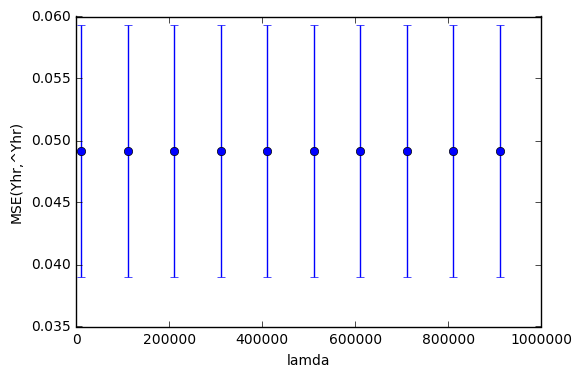

In [9]:
#rango = np.arange(100, 1001, 100)

mean3 = np.zeros((mean1000.shape[0], 3))
print mean2000.shape, mean3.shape
mean3[:, 0] = mean1000
mean3[:, 1] = mean2000
mean3[:, 2] = mean3000

#plt.plot(rango, mean3000,'o', label='b=3000')
#plt.plot(rango, mean1000, 'o', label='b=1000')
#plt.plot(rango, mean2000,'o', label='b=2000')
#plt.plot(rango, mean3.mean(axis=1),'o', label='b=all')
#plt.plot(rango, mean,'o', label='b=all')

#plt.plot(rango, mean+var,'o', label='b=all')
#plt.plot(rango, mean-var,'o', label='b=all')

#plt.errorbar(rango, mean, yerr=var, fmt='o', label='b=all')
plt.errorbar(rango, mean3.mean(axis=1), yerr=np.std(mean3, axis=1), fmt='o')


plt.legend()
plt.ylabel('MSE(Yhr,^Yhr)')
plt.xlabel(parameter_name)
#plt.legend(lala , loc=2, bbox_to_anchor=(1, 0.5))
#plt.ylim((1102000.0, 1102300.0))
mse[:,2,1]
#print plt.ylim((940000000.0, 960000000.0))

print 'medias=',mse.mean(),mse1000.mean(), mse2000.mean(), mse3000.mean() 
print 'std=',np.std(mse),np.std(mse1000), np.std(mse2000), np.std(mse3000) 
print 'mean1000', mean1000
print 'mean2000', mean2000
print 'mean', mean, mean.min()
print rango

import os
if not os.path.exists(base_folder+ 'res/'):
    try:
        os.makedirs(base_folder+ 'res/')
        print 'dir', base_folder+ 'res/', 'created!' 
    except OSError, e :
        print str(e)


## Para grabar
plt.savefig(base_folder+ 'res/'+parameter_name+'_mean_var_idjob'+idjob+'.pdf')


# Dibujando la reconstruida


(-0.53329432, 1.2652071)
A_g0_val0.
(-0.53329432, 1.2652071)
A_g0_val1.
(-0.53329432, 1.2652071)
A_g0_val2.
(-0.53329432, 1.2652071)
A_g0_val3.
(-0.53329432, 1.2652071)
A_g0_val4.
(-0.53329432, 1.2652071)
A_g0_val5.
(-0.53329432, 1.2652071)
A_g0_val6.
(-0.53329432, 1.2652071)
A_g0_val7.
(-0.53329432, 1.2652071)
A_g0_val8.
(-0.53329432, 1.2652071)
A_g0_val9.
(-0.38402563, 0.90539145)
A_g1_val0.
(-0.38405564, 0.90539145)
A_g1_val1.
(-0.38396174, 0.90539145)
A_g1_val2.
(-0.38397008, 0.90539145)
A_g1_val3.
(-0.38423559, 0.90539145)
A_g1_val4.
(-0.38402992, 0.90539145)
A_g1_val5.
(-0.3840217, 0.90539145)
A_g1_val6.
(-0.3840656, 0.90539145)
A_g1_val7.
(-0.38396537, 0.90539145)
A_g1_val8.
(-0.38405034, 0.90539145)
A_g1_val9.
(-0.4403826, 1.5744212)
A_g2_val0.
(-0.4403826, 1.5744212)
A_g2_val1.
(-0.4403826, 1.5744212)
A_g2_val2.
(-0.4403826, 1.5744212)
A_g2_val3.
(-0.4403826, 1.5744212)
A_g2_val4.
(-0.4403826, 1.5744212)
A_g2_val5.
(-0.4403826, 1.5744212)
A_g2_val6.
(-0.4403826, 1.5744212)
A_g

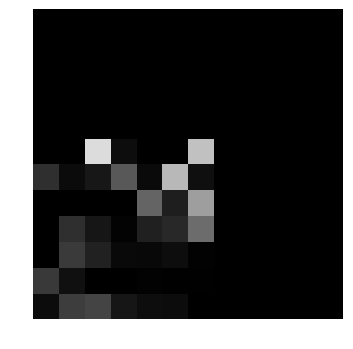

In [10]:
name_tmp3 = base_folder + 'A_g%d_val%d.npy'

for g in xrange(GROUPS):
    #if g == 0 : continue
    for i_val in xrange(len(rango)):
        val = rango[i_val]
        A = np.load(name_tmp3%(g,i_val))
        print mm(A, cast_int=False)
        plt = iu._is(A, vmin=0, vmax=1.5)
        name_img = ('A_g%d_val%d.npy'%(g, i_val))[:-3]
        print name_img
        plt.savefig(base_folder+ '/res/'+name_img +'png')

(-0.53329432, 1.2652071)
B_g0_val0.
(-0.53329432, 1.2652071)
B_g0_val1.
(-0.53329432, 1.2652071)
B_g0_val2.
(-0.53329432, 1.2652071)
B_g0_val3.
(-0.53329432, 1.2652071)
B_g0_val4.
(-0.53329432, 1.2652071)
B_g0_val5.
(-0.53329432, 1.2652071)
B_g0_val6.
(-0.53329432, 1.2652071)
B_g0_val7.
(-0.53329432, 1.2652071)
B_g0_val8.
(-0.53329432, 1.2652071)
B_g0_val9.
(-0.38402566, 0.9053914)
B_g1_val0.
(-0.38405564, 0.9053914)
B_g1_val1.
(-0.38396174, 0.9053914)
B_g1_val2.
(-0.38397008, 0.9053914)
B_g1_val3.
(-0.38423559, 0.9053914)
B_g1_val4.
(-0.3840299, 0.9053914)
B_g1_val5.
(-0.3840217, 0.9053914)
B_g1_val6.
(-0.3840656, 0.9053914)
B_g1_val7.
(-0.38396537, 0.9053914)
B_g1_val8.
(-0.38405034, 0.9053914)
B_g1_val9.
(-0.4403826, 1.574421)
B_g2_val0.
(-0.4403826, 1.574421)
B_g2_val1.
(-0.4403826, 1.574421)
B_g2_val2.
(-0.4403826, 1.574421)
B_g2_val3.
(-0.4403826, 1.574421)
B_g2_val4.
(-0.4403826, 1.574421)
B_g2_val5.
(-0.4403826, 1.574421)
B_g2_val6.
(-0.4403826, 1.574421)
B_g2_val7.
(-0.4403826

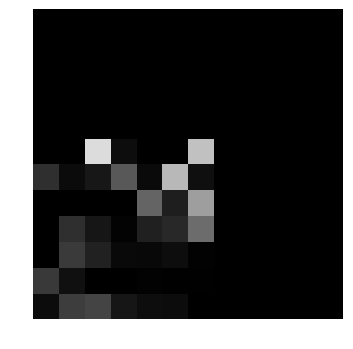

In [11]:
name_tmp3 = base_folder + 'B_g%d_val%d.npy'

for g in xrange(GROUPS):
    #if g == 0 : continue
    for i_val in xrange(len(rango)):
        val = rango[i_val]
        A = np.load(name_tmp3%(g,i_val))
        print mm(A, cast_int=False)
        plt = iu._is(A, vmin=0, vmax=1.5)
        name_img = ('B_g%d_val%d.npy'%(g, i_val))[:-3]
        print name_img
        plt.savefig(base_folder+ '/res/'+name_img +'png')

# Dibujando la original


./results/exp6pixel/f1/lamda.201610201227/i_hr_g0_105115.npy
(0.0, 4247856.0)
i_hr_g0_105115.
./results/exp6pixel/f1/lamda.201610201227/i_hr_g1_101006.npy
(0.0, 51.797764)
i_hr_g1_101006.
./results/exp6pixel/f1/lamda.201610201227/i_hr_g2_101107.npy
(0.0, 32.989147)
i_hr_g2_101107.
./results/exp6pixel/f1/lamda.201610201227/i_hr_g3_101915.npy
(0.0, 4.1959381)
i_hr_g3_101915.
./results/exp6pixel/f1/lamda.201610201227/i_hr_g4_102816.npy
(0.0, 4.2103333)
i_hr_g4_102816.


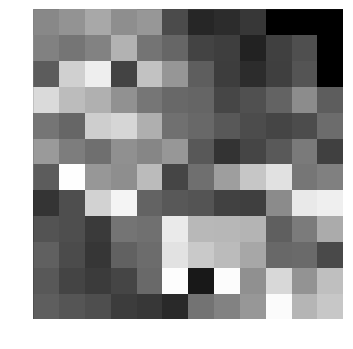

In [16]:
#subjetc_fited = [103111, 101006, 101107, 101915,102816]
#del(subject_fited)
subjetc_fited = [105115, 101006, 101107, 101915, 102816]

#name_tmp4 = base_folder + 'i_hr_g%d.npy'
name_tmp4 = base_folder + 'i_hr_g%d_%d.npy'

for g in xrange(5):
    #if g == 0 : continue
    
    #print name_tmp4%(g,)
    print name_tmp4%(g,subjetc_fited[g])
    
    #A = np.load(name_tmp4%(g,))
    A = np.load(name_tmp4%(g,subjetc_fited[g]))
    print mm(A, cast_int=False)
    plt = iu._is(A, vmin=0, vmax=1.5)
    #name_img = ('i_hr_g%d.png'%(g,))[:-3]
    name_img = ('i_hr_g%d_%d.png'%(g, subjetc_fited[g]))[:-3]
    print name_img
    plt.savefig(base_folder + '/res/' +name_img)

# Dibujando la upsampleada antes de minimizar


(0.00053765206, 4247856.0)
i_hr_fake_g0.
(0.00018188616, 2.9902432)
i_hr_fake_g1.
(0.0, 2.2149892)
i_hr_fake_g2.
(0.00099337357, 2.8161852)
i_hr_fake_g3.
(0.0024674172, 3.1205568)
i_hr_fake_g4.


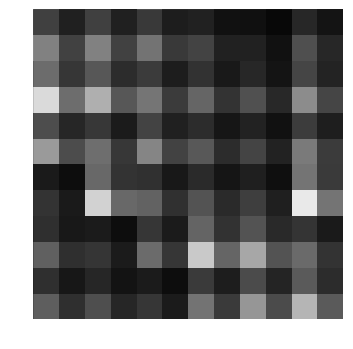

In [49]:
name_tmp4 = base_folder + 'i_hr_fake_g%d.npy'
for g in xrange(5):
    #if g == 0 : continue
    A = np.load(name_tmp4%(g,))
    print mm(A, cast_int=False)
    plt = iu._is(A, vmin=0, vmax=1.5)
    name_img = ('i_hr_fake_g%d.png'%(g,))[:-3]
    print name_img
    plt.savefig(base_folder + '/res/' +name_img)

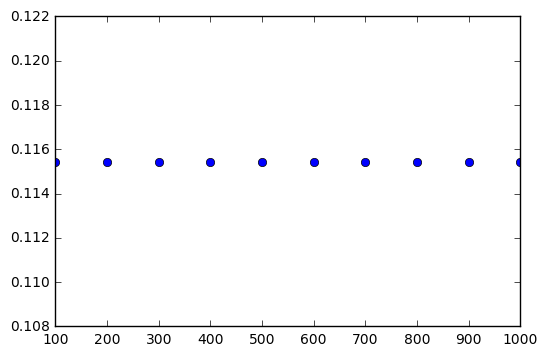

In [58]:
## Para grabar
g=4
for g in xrange(1):
    for i in xrange(1):
        a = plt.plot(rango, mse[:, i, g],'o')
    #plt.savefig('/user/lgomez/home/workspace/iqt/results/exp6/gammas/gamma_g'+str(g)+'_f'+str(i)+'.png')
    
    
#plt.savefig('/user/lgomez/home/workspace/iqt/results/exp6/gammas/gamma_all.png')
    

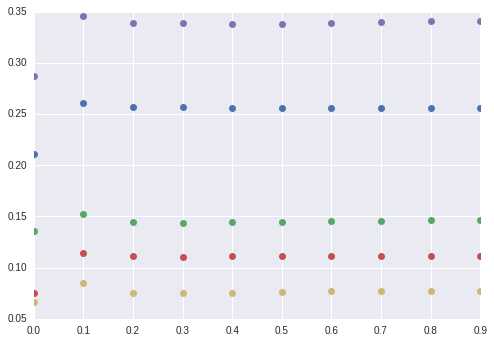

In [56]:
cluster = '1'
if cluster == '0':
    plt.plot(rango, mse[:, 0, 0],'o')
    plt.plot(rango, mse[:, 6, 0],'o')
    plt.plot(rango, mse[:, 7, 0],'o')

if cluster == '1':
    plt.plot(rango, mse[:, 1, 1],'o')
    plt.plot(rango, mse[:, 2, 1],'o')
    #plt.plot(rango, mse[:, 3, 0],'o')
    plt.plot(rango, mse[:, 4, 1],'o')
    plt.plot(rango, mse[:, 5, 1],'o')
    plt.plot(rango, mse[:, 8, 1],'o')



In [61]:
name_tmp4 = base_folder + 'i_hr_g%d.npy'
for g in xrange(5):
    A = np.load(name_tmp3%(g,))
    i_hr = np.load(name_tmp4%(g,))
    #print mm(A, cast_int=False)
    plt = iu._isc(A,i_hr, vmin=0, vmax=1, titles=['reconstructed', 'original'])
    name_img = base_folder + ('cmp_g%d'%(g))
    print name_img
    plt.savefig(name_img +'.png')

TypeError: not enough arguments for format string

In [9]:
i_hr = np.load(base_folder+'i_hr_g0.npy')
A910000 = np.load(base_folder+'A_g0_lamda910000.npy')
iu._isc(A910000,i_hr, vmax=1.4)
A910000.min(), A910000.max(), A910000.shape
del(A100)

IOError: [Errno 2] No such file or directory: './results/exp6/f1/gamma/A_g0_lamda910000.npy'

(0.0, 2729.8464)

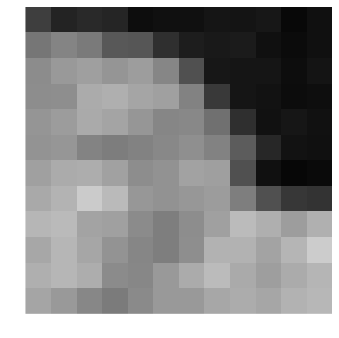

In [16]:
iu._is(i_hr, vmax=2729)
i_hr.min(),i_hr.max()

(-1.5125681573504312e-05, 1.4016132523250628, (12, 12, 12, 270))

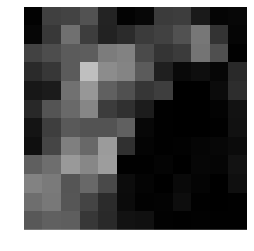

In [51]:
A1000 = np.load(base_folder+'A_g0_lamda1000.npy')
iu._is(A1000, vmax=A1000.max())
A1000.min(), A1000.max(), A1000.shape

(-1.5125681573504312e-05, 1.4016132523250628, (12, 12, 12, 270))

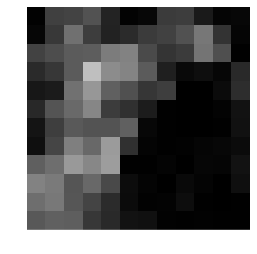

In [51]:
A1000 = np.load(base_folder+'A_g0_lamda3000.npy')
iu._is(A1000, vmax=A1000.max())
A1000.min(), A1000.max(), A1000.shape

In [30]:
alala = []
for val in rango :
    alala.append(val)
    
print alala

[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]
